<a href="https://colab.research.google.com/github/jimilee/covid_da/blob/main/Covid19_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret
!pip install pycaret-ts-alpha
import pandas as pd
import numpy as np
# from pycaret.datasets import get_data # data forcasting with pycaret.

     |████████████████████████████████| 301 kB 5.1 MB/s 
     |████████████████████████████████| 114 kB 70.9 MB/s 
     |████████████████████████████████| 15.6 MB 56.9 MB/s 
     |████████████████████████████████| 56 kB 5.6 MB/s 
     |████████████████████████████████| 1.3 MB 49.7 MB/s 
     |████████████████████████████████| 261 kB 58.8 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 1.7 MB 47.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 167 kB 66.8 MB/s 
     |████████████████████████████████| 2.0 MB 58.7 MB/s 
     |████████████████████████████████| 6.8 MB 58.8 MB/s 
     |████████████████████████████████| 10.9 MB 54.5 MB/s 
     |████████████████████████████████| 636 kB 64.1 MB/s 
     |████████████████████████████████| 303 kB 60.4 MB/s 
     |████████████████

In [ ]:
def get_origin_data(sr, p): # get origin from pre-processed data( log1p + diff )
  tmp = p
  org_list = []
  idx = sr.index
  for d in sr:
    org_list.append(tmp + d)
    tmp = tmp + d
  back = np.expm1(org_list)
  return pd.Series(back, idx)


Date
2021-07-12     1100.0
2021-07-13     1150.0
2021-07-14     1613.0
2021-07-15     1599.0
2021-07-16     1535.0
               ...   
2022-01-23     7628.0
2022-01-24     7512.0
2022-01-25     8570.0
2022-01-26    13010.0
2022-01-27    14518.0
Length: 200, dtype: float64
7.00397413672268


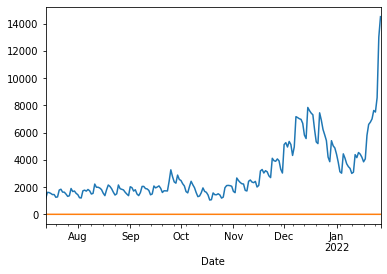

In [ ]:

# Convert dataframe for pycaret.
covid_data_origin = pd.read_excel('/content/drive/MyDrive/코로나바이러스감염증-19_확진환자_발생현황_220127.xlsx', skiprows=range(4))
covid_data_origin = covid_data_origin.drop(0)
covid_data_origin.columns=['Date','Total','Domestic','Inflow','Death']
idx = pd.to_datetime(covid_data_origin['Date'])

total_list = covid_data_origin['Total'].replace(['-'],'0').astype(np.float64).tolist()
covid_data = pd.Series(total_list, idx)
covid_data = covid_data.iloc[len(covid_data)-200:] #최근 200일의 데이터만 추출!
print(covid_data)

covid_data_org = covid_data
# covid_data_org.plot()

covid_data = np.log1p(covid_data)
first = covid_data[0]
print(first)
covid_data = covid_data.diff().dropna()

covid_after = get_origin_data(covid_data, first)
covid_after.plot()

# plot the data
covid_data.plot()


In [ ]:
# with functional API
from pycaret.time_series import *
setup(covid_data, fh = 7, fold = 3, session_id = 123)
# with new object-oriented API
from pycaret.internal.pycaret_experiment import TimeSeriesExperiment
exp = TimeSeriesExperiment()
exp.setup(covid_data, fh = 7, fold = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(199, 1)"
2,Missing Values,False
3,Transformed Train Set,"(192,)"
4,Transformed Test Set,"(7,)"
5,Fold Generator,ExpandingWindowSplitter
6,Fold Number,3
7,Enforce Prediction Interval,False
8,Seasonal Period Tested,7
9,Seasonality Detected,True


In [ ]:
check_stats()

,Test,Test Name,Property,Setting,Value
0,Summary,Statistics,Length,,199
1,Summary,Statistics,Mean,,0.012961
2,Summary,Statistics,Median,,-0.0296098
3,Summary,Statistics,Standard Deviation,,0.16727
4,Summary,Statistics,Variance,,0.0279794
5,Summary,Statistics,Kurtosis,,0.772062
6,Summary,Statistics,Skewness,,1.16566
7,Summary,Statistics,# Distinct Values,,199
8,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 24}",513.368
9,White Noise,Ljung-Box,Test Statictic,"{'alpha': 0.05, 'K': 48}",951.834


In [ ]:
# # functional API
plot_model(plot = 'ts')
# object-oriented API
exp.plot_model(plot = 'ts')

In [ ]:
# cross-validation plot
plot_model(plot = 'cv')

In [ ]:
# ACF plot
plot_model(plot = 'acf')

In [ ]:
# Diagnostics plot
plot_model(plot = 'diagnostics')

In [ ]:
# Decomposition plot
plot_model(plot = 'decomp_stl')

In [ ]:
# functional API
best = compare_models()
# object-oriented API
best = exp.compare_models()

,Model,MAE,RMSE,MAPE,SMAPE,MASE,R2,TT (Sec)
arima,ARIMA,0.0593,0.074,0.8924,0.7161,0.7416,0.7175,0.0633
snaive,Seasonal Naive Forecaster,0.0586,0.073,0.8747,0.7165,0.7327,0.7246,0.0167
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,0.0451,0.0536,0.6206,0.8134,0.5639,0.8532,0.0667
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.0475,0.0565,0.6453,0.8515,0.5938,0.8366,0.6667
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.0543,0.0632,0.7399,0.9136,0.6785,0.798,0.0867
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.0591,0.0673,0.88,0.9255,0.7386,0.7735,0.4967
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.052,0.0588,0.7113,0.9506,0.65,0.8263,0.0300
auto_arima,Auto ARIMA,0.0515,0.0623,0.6675,0.956,0.6429,0.8101,19.8767
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.0903,0.1216,1.0914,0.9702,1.1257,0.3859,0.0267
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.0531,0.0611,0.7388,0.974,0.6634,0.8219,0.6267


In [ ]:
# create fbprophet model
prophet = create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-12-30,0.0500,0.0575,0.5423,0.9357,0.6148,0.8953
1,2022-01-06,0.0439,0.0469,0.7225,0.9383,0.5486,0.9000
2,2022-01-13,0.0684,0.0838,0.8346,1.1407,0.8632,0.6305
Mean,NaT,0.0541,0.0627,0.6998,1.0049,0.6755,0.8086
SD,NaT,0.0104,0.0155,0.1204,0.0960,0.1354,0.1260


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.05,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=10.0, mcmc_samples=0,
                     n_changepoints=25, seasonality_mode='additive',
                     seasonality_prior_scale=10.0, stan_backend=None,
                     uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [ ]:
tuned_prophet = tune_model(prophet)
print(tuned_prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,R2
0,2021-12-30,0.0351,0.0435,0.4137,0.3643,0.4317,0.9400
1,2022-01-06,0.0514,0.0634,0.9206,0.6236,0.6431,0.8168
2,2022-01-13,0.1045,0.1178,1.3030,1.2125,1.3196,0.2696
Mean,NaT,0.0637,0.0749,0.8791,0.7335,0.7981,0.6755
SD,NaT,0.0296,0.0314,0.3643,0.3549,0.3787,0.2914


ProphetPeriodPatched(add_country_holidays=None, add_seasonality=None,
                     alpha=0.05, changepoint_prior_scale=0.006204765906220314,
                     changepoint_range=0.8, changepoints=None,
                     daily_seasonality='auto', freq=None, growth='linear',
                     holidays=None, holidays_prior_scale=0.7814989008992034,
                     mcmc_samples=0, n_changepoints=25,
                     seasonality_mode='additive',
                     seasonality_prior_scale=2.1429563090768995,
                     stan_backend=None, uncertainty_samples=1000, verbose=0,
                     weekly_seasonality='auto', yearly_seasonality='auto')


In [ ]:
plot_model(best, plot = 'forecast')

In [ ]:
# forecast in unknown future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 30})


In [ ]:
# in-sample plot
plot_model(best, plot = 'insample')

In [ ]:
# residuals plot
plot_model(best, plot = 'residuals')

In [ ]:
# diagnostics plot
plot_model(best, plot = 'diagnostics')

2021-07-13    0.044412
2021-07-14    0.338084
2021-07-15   -0.008712
2021-07-16   -0.040822
2021-07-17   -0.057618
                ...   
2022-02-02    0.420900
2022-02-03    0.113100
2022-02-04    0.033900
2022-02-05    0.041500
2022-02-06    0.091800
Length: 209, dtype: float64
=====


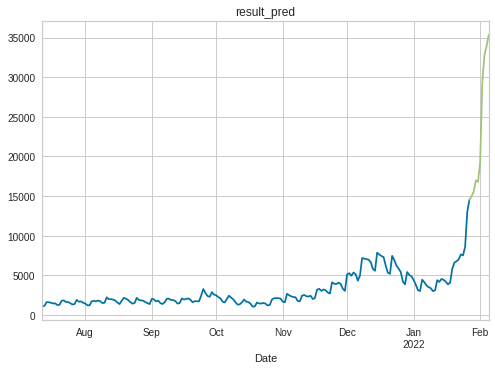

In [ ]:
# finalize model
final_best = finalize_model(best)
# generate predictions
pred = predict_model(final_best, fh = 10)
pred.index = pred.index.to_timestamp()
res = pd.concat([covid_data, pred], axis = 0)

print(res)
print('=====')
result_data = get_origin_data(res, first)[len(covid_data)-1:-1]
covid_data_org.plot()
result_data.plot(title='result_pred')

In [ ]:
# save the model
save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(ARIMA(maxiter=50, method='lbfgs', order=(1, 0, 0), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 7),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True), 'my_best_model.pkl')